In [5]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
import random

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=10),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [3]:
P_all=list(np.linspace(60,80,11))
M_all=list(np.linspace(60,76,9))
all=[]
timea=[]
timei=[]
timer=[]
timee=[]
plist=[]
mlist=[]
df=pd.DataFrame()
for i in range(0,len(P_all)):
    for j in range(0,len(M_all)):
        time=[]
        P=P_all[i]
        M=M_all[j]
        a=(P-1.7)/132*24322000
        b=(M-0.6)/121*26134000
        class MyProblem(Problem):
            def __init__(self):
        #self.cost_matrix = cost_matrix
                super().__init__(n_var=14,   
                             n_obj=3,  
                             n_constr=7,  
                             xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                             xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),  
                             )
            def _evaluate(self, x, out, *args, **kwargs):

        
                alpha=0.6
                belta=0.7
                f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
                f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/1.6*10**5-x[:, 13]/4109
                f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
                f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
                #g1 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]+(4.97*10**7/365+2.65*10**6/365+9.61*10**6/36)*30
                g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
                g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
                g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
                g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
                g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
                g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
                g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
                g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
                g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
                out["F"] = np.column_stack([ f2,f3,f4])
                out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
        res = minimize(MyProblem(),
                   algorithm,
                   seed=1,
                   termination=('n_gen', 1000))
        answer=res.X[:1].squeeze().tolist()
        timea.append((answer[0]+answer[1]+answer[6]+answer[7])/(4.97*10**7/365))
        timei.append((answer[2]+answer[3]+answer[8]+answer[9])/(2.65*10**6/365))
        timer.append((answer[4]+answer[5]+answer[10]+answer[11])/(9.61*10**6/365))
        timee.append((answer[12]*(0.3*P+12.5)+answer[13]*(0.3*M+12.8))/10**6)
        plist.append(P)
        mlist.append(M)
        print(P,M,timei,plist)
        all.append(min(timea[-1],timei[-1],timer[-1],timee[-1]))

60.0 60.0 [104.09694264977198] [60.0]
60.0 62.0 [104.09694264977198, 142.69308438355364] [60.0, 60.0]
60.0 64.0 [104.09694264977198, 142.69308438355364, 90.96151414713054] [60.0, 60.0, 60.0]
60.0 66.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627] [60.0, 60.0, 60.0, 60.0]
60.0 68.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276] [60.0, 60.0, 60.0, 60.0, 60.0]
60.0 70.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
60.0 72.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
60.0 74.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0

64.0 74.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0]
64.0 76.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48

68.0 60.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 68.0]
68.0 62.0 [104.09694264977198, 142.69308438

68.0 76.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736] [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 64

70.0 72.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

72.0 66.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

74.0 60.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

74.0 70.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

76.0 62.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

76.0 72.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

78.0 62.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

78.0 70.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

80.0 60.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

80.0 68.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

80.0 76.0 [104.09694264977198, 142.69308438355364, 90.96151414713054, 90.023966477627, 112.27416785079276, 92.93567817049473, 224.28011757692482, 122.80499460357593, 142.99759097951312, 127.07225600878293, 86.78129000901305, 98.164960952781, 83.11894328710565, 175.7193068523325, 183.31733770540723, 88.19175898296004, 123.48739909226413, 127.79208775916938, 105.46984054393191, 126.64028115917111, 136.29402755170364, 105.69385322322026, 116.37636841785529, 184.64822107037094, 190.90601092301634, 202.6232815017924, 310.43621297775854, 115.45385658779324, 84.83205670388402, 90.82989310656184, 113.40089031498388, 103.62740116590469, 155.95147014115813, 284.96957950428276, 125.94774993130065, 97.3092931824889, 122.30026960831913, 94.18605324730515, 98.95389236005657, 116.2608504895894, 89.64048081417572, 171.55519938020763, 106.56798507517135, 183.22223145551834, 382.2327586770736, 103.96303367573621, 102.80120912253803, 218.2860682948101, 114.52789312253573, 115.90478673686228, 251.21954818

In [6]:
df=pd.DataFrame()
df['P']=plist
df['M']=mlist
df['Agri']=timea
df['Ind']=timei
df['Res']=timer
df['Ele']=timee
df

,P,M,Agri,Ind,Res,Ele
0,60.0,60.0,83.237096,104.096943,81.493964,90.178166
1,60.0,62.0,81.025332,142.693084,137.626442,83.576810
2,60.0,64.0,83.854367,90.961514,112.527842,123.411042
3,60.0,66.0,80.086832,90.023966,166.927181,82.227407
4,60.0,68.0,80.294521,112.274168,176.998239,84.203493
...,...,...,...,...,...,...
94,80.0,68.0,80.458076,236.348788,296.432938,83.921352
95,80.0,70.0,88.994461,242.614940,81.534803,233.221961
96,80.0,72.0,82.258994,235.748041,325.127368,80.397162
97,80.0,74.0,81.747858,285.924749,112.366189,275.523689


In [7]:
t = np.linspace(120,200,9)
addition = np.ones([9,99])
for i in range(len(t)):
    for j in range(99):
        if t[i]>timea[j]:
            addition[i][j] += (t[i]-timea[j])*131500
        if t[i]>timei[j]:
            addition[i][j] += (t[i]-timei[j])*7260
        if t[i]>timer[j]:
            addition[i][j] += (t[i]-timer[j])*26329
        if t[i]>timee[j]:
            addition[i][j] += (t[i]-timer[j])*30000
        if addition[i][j]<0:
            addition[i][j]=0
addition

array([[ 7118785.56774808,  4596376.580924  ,  5160705.62200099,
         4058393.21448272,  3567413.86336444,  3899119.97018558,
         2772747.97988441,   977812.24014046,  6035336.58865183,
         4263513.72763918,  6886334.56522354,  6092289.86523195,
         6445087.10224058,  2485348.78637593,  3160701.2355307 ,
         5357390.65302143,  1729000.43064569,  5130597.00536333,
         3583322.49840656,  5817208.44489394,  5234784.84907337,
         5335347.7887344 ,  2111973.38940583,  2608725.22787621,
         2429312.11542205,   364625.64911198,  1994997.09903426,
         6027145.47713225,  5969569.88131017,  5951714.52195394,
         5445821.55577045,  5340148.45861487,  1797785.50568557,
         2072317.05639649,        0.        ,    46685.50918556,
         6005805.63329789,  6255911.16506793,  1657420.55129182,
         5992790.93880672,  5182249.69414895,  5121054.45169682,
          897622.21106304,        0.        ,  1134224.95078663,
         5894991.68947922

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


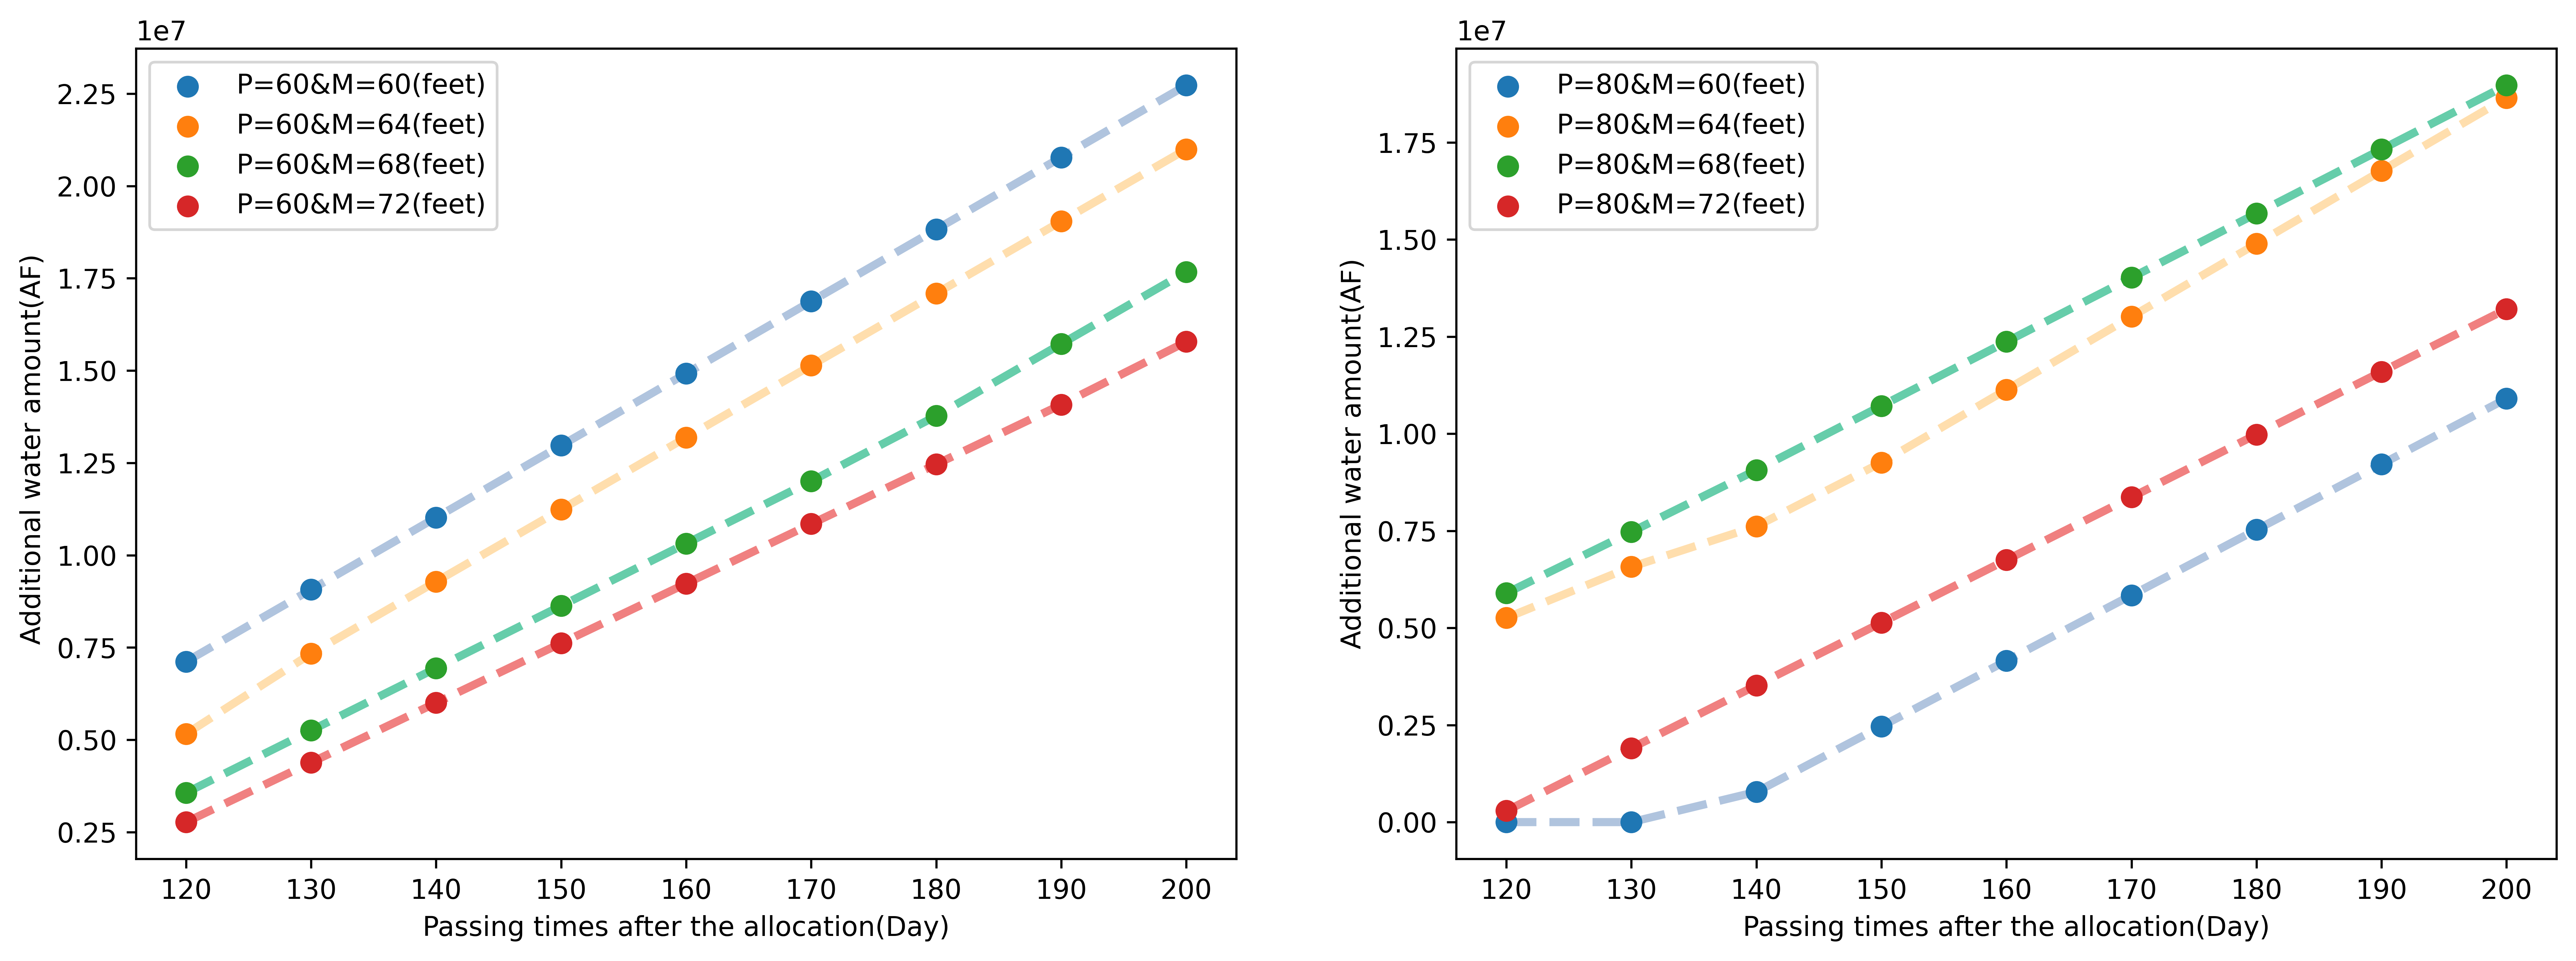

In [11]:
fig = plt.figure(figsize=(16,5.5), dpi=600)
plt.subplot(121)
df1=df[df['P']==62]
plt.scatter(t, addition[:,0], marker='o',s=50, label='P=60&M=60(feet)',zorder=2)
plt.plot(t, addition[:,0], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,2], marker='o',s=50, label='P=60&M=64(feet)',zorder=2)
plt.plot(t, addition[:,2], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,4], marker='o',s=50, label='P=60&M=68(feet)',zorder=2)
plt.plot(t, addition[:,4], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,6], marker='o',s=50, label='P=60&M=72(feet)',zorder=2)
plt.plot(t, addition[:,6], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Passing times after the allocation(Day)')
plt.ylabel(' Additional water amount(AF)')
plt.legend(fontsize='10',loc='upper left',facecolor='none')
plt.subplot(122)
plt.scatter(t, addition[:,80], marker='o',s=50, label='P=80&M=60(feet)',zorder=2)
plt.plot(t, addition[:,80], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,82], marker='o',s=50, label='P=80&M=64(feet)',zorder=2)
plt.plot(t, addition[:,82], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,84], marker='o',s=50, label='P=80&M=68(feet)',zorder=2)
plt.plot(t, addition[:,84], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(t, addition[:,86], marker='o',s=50, label='P=80&M=72(feet)',zorder=2)
plt.plot(t, addition[:,86], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Passing times after the allocation(Day)')
plt.ylabel('Additional water amount(AF)')
plt.legend(fontsize='10',loc='upper left',facecolor='none')
fig.savefig('additionaldemands.eps', dpi = 1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


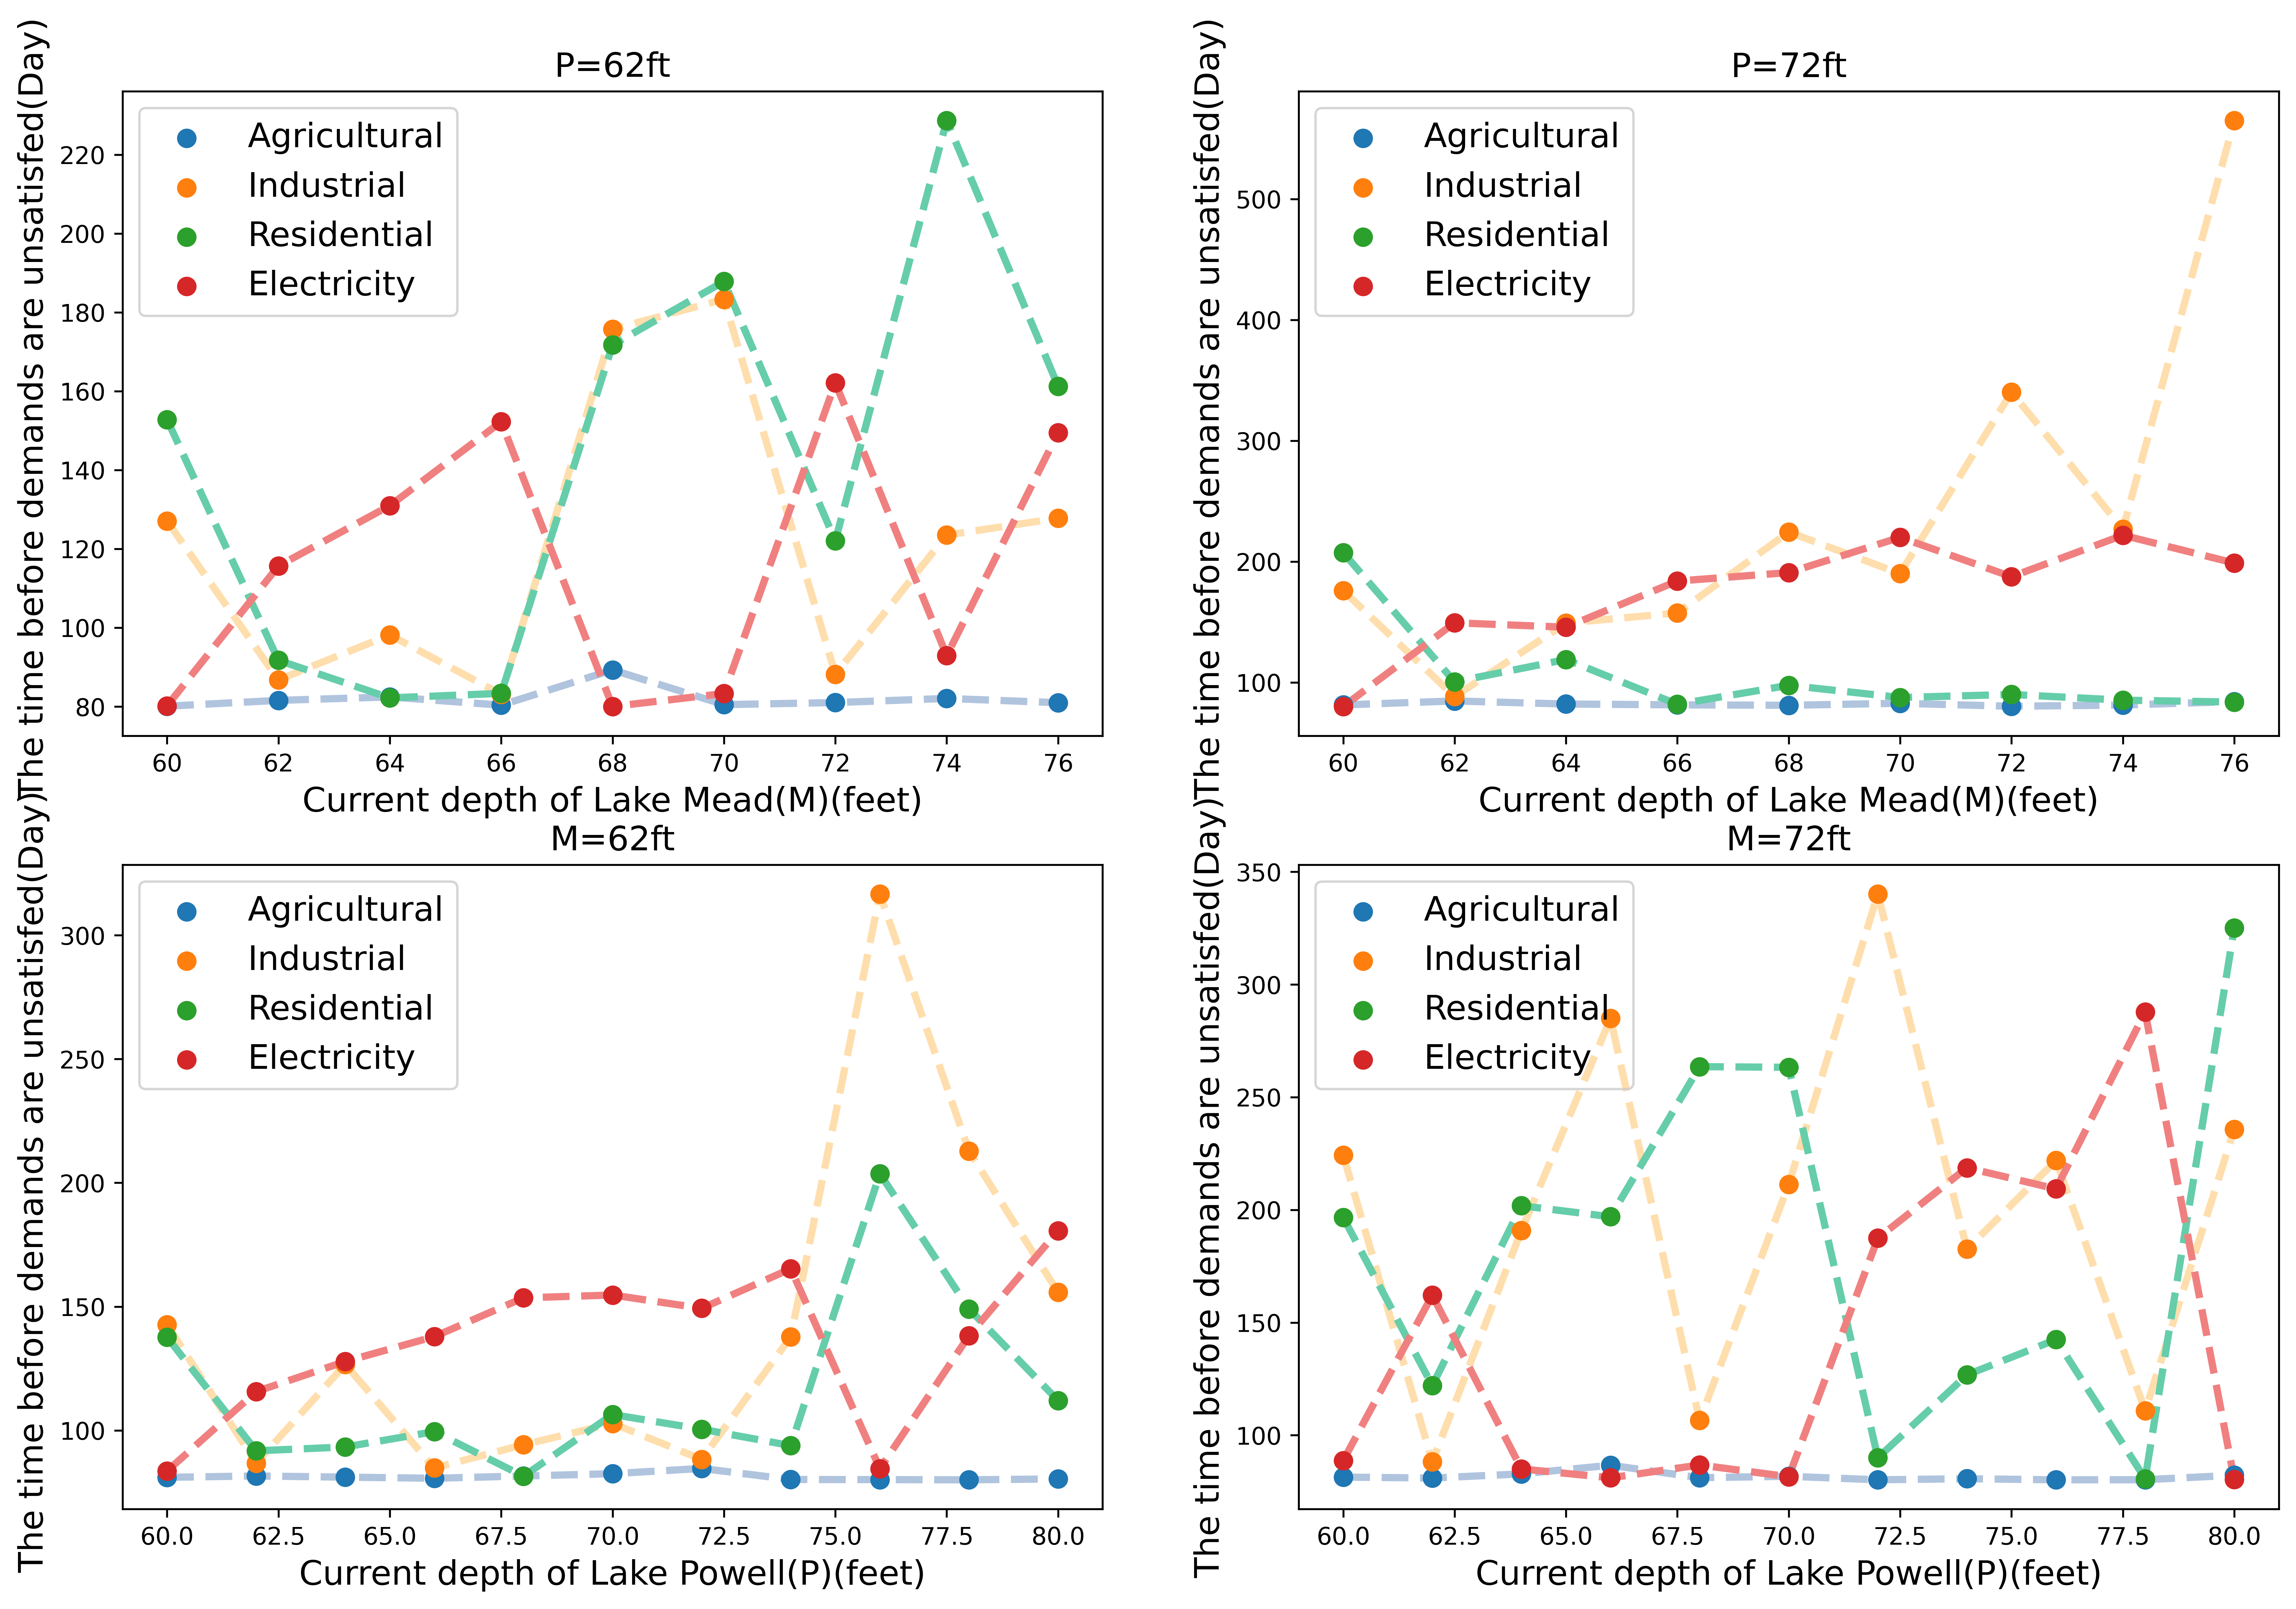

In [16]:
fig = plt.figure(figsize=(16,10.8), dpi=600)
plt.subplot(221)
df1=df[df['P']==62]
plt.scatter(df1["M"], df1["Agri"], marker='o',s=50, label='Agricultural',zorder=2)
plt.plot(df1["M"], df1["Agri"], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Ind"], marker='o',s=50, label='Industrial',zorder=2)
plt.plot(df1["M"], df1["Ind"], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Res"], marker='o',s=50, label='Residential',zorder=2)
plt.plot(df1["M"], df1["Res"], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Ele"], marker='o',s=50, label='Electricity',zorder=2)
plt.plot(df1["M"], df1["Ele"], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Current depth of Lake Mead(M)(feet)',fontsize='14')
plt.ylabel(' The time before demands are unsatisfed(Day)',fontsize='14')
plt.legend(fontsize='14',loc='upper left',facecolor='none')
plt.title('P=62ft',fontsize='14')
plt.subplot(222)
df1=df[df['P']==72]
plt.scatter(df1["M"], df1["Agri"], marker='o',s=50, label='Agricultural',zorder=2)
plt.plot(df1["M"], df1["Agri"], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Ind"], marker='o',s=50, label='Industrial',zorder=2)
plt.plot(df1["M"], df1["Ind"], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Res"], marker='o',s=50, label='Residential',zorder=2)
plt.plot(df1["M"], df1["Res"], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(df1["M"], df1["Ele"], marker='o',s=50, label='Electricity',zorder=2)
plt.plot(df1["M"], df1["Ele"], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Current depth of Lake Mead(M)(feet)',fontsize='14')
plt.ylabel(' The time before demands are unsatisfed(Day)',fontsize='14')
plt.legend(fontsize='14',loc='upper left',facecolor='none')
plt.title('P=72ft',fontsize='14')
plt.subplot(223)
df1=df[df['M']==62]
plt.scatter(df1["P"], df1["Agri"], marker='o',s=50, label='Agricultural',zorder=2)
plt.plot(df1["P"], df1["Agri"], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Ind"], marker='o',s=50, label='Industrial',zorder=2)
plt.plot(df1["P"], df1["Ind"], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Res"], marker='o',s=50, label='Residential',zorder=2)
plt.plot(df1["P"], df1["Res"], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Ele"], marker='o',s=50, label='Electricity',zorder=2)
plt.plot(df1["P"], df1["Ele"], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Current depth of Lake Powell(P)(feet)',fontsize='14')
plt.ylabel(' The time before demands are unsatisfed(Day)',fontsize='14')
plt.legend(fontsize='14',loc='upper left',facecolor='none')
plt.title('M=62ft',fontsize='14')
plt.subplot(224)
df1=df[df['M']==72]
plt.scatter(df1["P"], df1["Agri"], marker='o',s=50, label='Agricultural',zorder=2)
plt.plot(df1["P"], df1["Agri"], '--',color='lightsteelblue',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Ind"], marker='o',s=50, label='Industrial',zorder=2)
plt.plot(df1["P"], df1["Ind"], '--',color='navajowhite',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Res"], marker='o',s=50, label='Residential',zorder=2)
plt.plot(df1["P"], df1["Res"], '--',color='mediumaquamarine',linewidth = '3',zorder=1)
plt.scatter(df1["P"], df1["Ele"], marker='o',s=50, label='Electricity',zorder=2)
plt.plot(df1["P"], df1["Ele"], '--',color='lightcoral',linewidth = '3',zorder=1)
plt.xlabel('Current depth of Lake Powell(P)(feet)',fontsize='14')
plt.ylabel('The time before demands are unsatisfed(Day)',fontsize='14')
plt.legend(fontsize='14',loc='upper left',facecolor='none')
plt.title('M=72ft',fontsize='14')
fig.savefig('additionaltime.eps', dpi = 1200)